# Exploding datasets with Pandas
### Done by 
##### Ramakrishnan Subramanian

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
matches = pd.read_csv('matches.csv')

##### getting the information of each and every feature in the dataset

In [82]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           636 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

##### 5 point analysis for the numerical features

In [83]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


##### Checking for null values 

In [84]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

# Exploring pandas

### 1 How many matched do we have in the data set?

In [4]:
print("we've",matches.id.count(),'matches')  # data is already cleaned (no duplicates, and nan rows were removed)

we've 636 matches


### 2 How many seasons have we got in the data set?

In [5]:
a = matches['season'].value_counts()
print('Number of seasons in the DataFrame: ', a.count())

Number of seasons in the DataFrame:  10


### 3 Which team had won by maximum runs?

In [6]:
matches.loc[matches.win_by_runs == matches.win_by_runs.max(),'winner']

43    Mumbai Indians
Name: winner, dtype: object

### 4 Which teams had win by maximum wicket?

In [241]:
matches.loc[matches.win_by_wickets == matches.win_by_wickets.max(),'winner'].dropna()

2            Kolkata Knight Riders
34                 Kings XI Punjab
71                 Deccan Chargers
119               Delhi Daredevils
183    Royal Challengers Bangalore
298               Rajasthan Royals
376                 Mumbai Indians
390            Chennai Super Kings
542    Royal Challengers Bangalore
590            Sunrisers Hyderabad
Name: winner, dtype: object

### 5 Which team had won by closest Margin (minimum runs)?

In [12]:
print('Won by minimum runs: ', min(matches[matches.win_by_runs >0].win_by_runs))

Won by minimum runs:  1


In [14]:
matches[matches.win_by_runs == min(matches[matches.win_by_runs >0].win_by_runs)].winner

58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344               Delhi Daredevils
350                 Mumbai Indians
518            Chennai Super Kings
598                  Gujarat Lions
614    Royal Challengers Bangalore
Name: winner, dtype: object

### 6 Which team had won by minimum wickets?

In [15]:
matches.loc[matches.win_by_wickets == min(matches[matches.win_by_wickets>0].win_by_wickets)].winner.dropna()

559    Kolkata Knight Riders
Name: winner, dtype: object

### 7 Which season had most number of matches?

In [27]:
season = matches.groupby(by = 'season').describe().id.dropna()
season['count'].sort_values(ascending = False)

season
2013    76.0
2012    74.0
2011    73.0
2016    60.0
2014    60.0
2010    60.0
2017    59.0
2015    59.0
2008    58.0
2009    57.0
Name: count, dtype: float64

- We can see that 2013 had the most number of matches (76) 

### 8 Which IPL team is more successful?

In [28]:
df = matches.groupby(by='winner').id.describe()
df.max()

count     92.000000
mean     607.600000
std      275.934914
min      577.000000
25%      598.000000
50%      609.000000
75%      625.000000
max      636.000000
dtype: float64

In [30]:
df['count'].sort_values(ascending=False)

winner
Mumbai Indians                 92.0
Chennai Super Kings            79.0
Kolkata Knight Riders          77.0
Royal Challengers Bangalore    73.0
Kings XI Punjab                70.0
Rajasthan Royals               63.0
Delhi Daredevils               62.0
Sunrisers Hyderabad            42.0
Deccan Chargers                29.0
Gujarat Lions                  13.0
Pune Warriors                  12.0
Rising Pune Supergiant         10.0
Kochi Tuskers Kerala            6.0
Rising Pune Supergiants         5.0
Name: count, dtype: float64

- We can see that Mumbai Indians is the most successful team with 92 wins. 

### 9 Has toss-winning helped in winning matches?

In [230]:
matches['toss_game'] = np.where((matches['toss_winner']==matches['winner']), 'yes','no')
a = matches['toss_game'].value_counts()
print(a)

yes    325
no     311
Name: toss_game, dtype: int64


In [217]:
xaxis = ['lost the game','won the game']

Text(0, 0.5, 'matches')

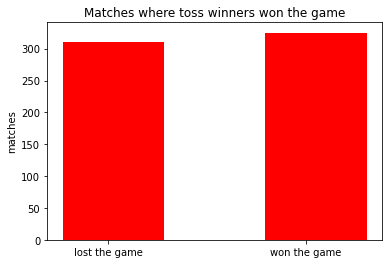

In [229]:
plt.hist(matches.toss_game, bins = 3, color = 'r')
plt.xticks([0.15,0.80],xaxis)
plt.title('Matches where toss winners won the game')
plt.ylabel('matches')

- We can see that toss winning did help in winning the matches. 

### 10 Team with most number of wins each season

In [51]:
matches['winner'].fillna('-',inplace=True)

In [81]:
matches[matches['winner'] != '-'][['season','winner']].groupby(by='season').describe().stack(0)[['top','freq']]

,,top,freq
season,,,
2008,winner,Rajasthan Royals,13
2009,winner,Delhi Daredevils,10
2010,winner,Mumbai Indians,11
2011,winner,Chennai Super Kings,11
2012,winner,Kolkata Knight Riders,12
2013,winner,Mumbai Indians,13
2014,winner,Kings XI Punjab,12
2015,winner,Chennai Super Kings,10
2016,winner,Sunrisers Hyderabad,11
